In [4]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
# from tqdm import tqdm
%matplotlib inline

In [5]:
from road_network.road_and_cars import VoidGenerator, Line, LineWLight, Crossroad, Car, CarManager, RoadManager, speeds
from road_network.prebuild_set import CrossroadAndLines, CrossroadAndLines2x2

x - вниз  
y - вправо

      1  
    2 0 4  
      3

       2 3  
    0       0
    1       1
       2 3

In [3]:
CarManager.all_cars = []

In [4]:
RoadManager.roads = []

In [5]:
cross1 = CrossroadAndLines2x2(10, 20, 10, name="Cross1")
cross2 = CrossroadAndLines2x2(10, 20, 10, name="Cross2")
cross3 = CrossroadAndLines2x2(10, 20, 10, name="Cross3")
cross4 = CrossroadAndLines2x2(10, 20, 10, name="Cross4")

# void_ver = VoidGenerator(1, random_walk=True, rotate_in_case=True)
# void_hor = VoidGenerator(1, random_walk=True, rotate_in_case=True)

void_ver = VoidGenerator(.6, random_walk=True, p_rot=[[.15, .15, .35, .35],
                                                      [.35, .35, .15, .15],
                                                      [.35, .35, .15, .15],
                                                      [.15, .15, .35, .35]], first_n = 4, rotate_in_case=True)
void_hor = VoidGenerator(.6, random_walk=True, p_rot=[[.35, .35, .15, .15],
                                                      [.15, .15, .35, .35],
                                                      [.15, .15, .35, .35],
                                                      [.35, .35, .15, .15]], first_n = 4, rotate_in_case=True)

In [6]:
cross1.crossroad1.output_roads[0].add_output(void_hor, 0, 0)
cross1.crossroad1.output_roads[3].add_output(void_ver, 0, 1)

cross1.crossroad2.output_roads[1].add_output(cross2.crossroad1.input_roads[1], 0, 0)
cross1.crossroad2.output_roads[3].add_output(void_ver, 0, 2)

cross1.crossroad3.output_roads[0].add_output(void_hor, 0, 3)
cross1.crossroad3.output_roads[2].add_output(cross3.crossroad1.input_roads[2], 0, 0)

cross1.crossroad4.output_roads[1].add_output(cross2.crossroad3.input_roads[1], 0, 0)
cross1.crossroad4.output_roads[2].add_output(cross3.crossroad2.input_roads[2], 0, 0)

################################################################
cross2.crossroads[0].output_roads[0].add_output(cross1.crossroad2.input_roads[0], 0, 0)
cross2.crossroads[0].output_roads[3].add_output(void_ver, 0, 4)

cross2.crossroads[1].output_roads[1].add_output(void_hor, 0, 5)
cross2.crossroads[1].output_roads[3].add_output(void_ver, 0, 6)

cross2.crossroads[2].output_roads[0].add_output(cross1.crossroad4.input_roads[0], 0, 0)
cross2.crossroads[2].output_roads[2].add_output(cross4.crossroad1.input_roads[2], 0, 0)

cross2.crossroads[3].output_roads[1].add_output(void_hor, 0, 7)
cross2.crossroads[3].output_roads[2].add_output(cross4.crossroad2.input_roads[2], 0, 0)

################################################################
cross3.crossroads[0].output_roads[0].add_output(void_hor, 0, 8)
cross3.crossroads[0].output_roads[3].add_output(cross1.crossroad3.input_roads[3], 0, 0)

cross3.crossroads[1].output_roads[1].add_output(cross4.crossroad1.input_roads[1], 0, 0)
cross3.crossroads[1].output_roads[3].add_output(cross1.crossroad4.input_roads[3], 0, 0)

cross3.crossroads[2].output_roads[0].add_output(void_hor, 0, 9)
cross3.crossroads[2].output_roads[2].add_output(void_ver, 0, 10)

cross3.crossroads[3].output_roads[1].add_output(cross4.crossroad3.input_roads[1], 0, 0)
cross3.crossroads[3].output_roads[2].add_output(void_ver, 0, 11)

################################################################
cross4.crossroads[0].output_roads[0].add_output(cross3.crossroad2.input_roads[0], 0, 0)
cross4.crossroads[0].output_roads[3].add_output(cross2.crossroad3.input_roads[3], 0, 0)

cross4.crossroads[1].output_roads[1].add_output(void_hor, 0, 12)
cross4.crossroads[1].output_roads[3].add_output(cross2.crossroad4.input_roads[3], 0, 0)

cross4.crossroads[2].output_roads[0].add_output(cross3.crossroads[3].input_roads[0], 0, 0)
cross4.crossroads[2].output_roads[2].add_output(void_ver, 0, 13)

cross4.crossroads[3].output_roads[1].add_output(void_hor, 0, 14)
cross4.crossroads[3].output_roads[2].add_output(void_ver, 0, 15)
############################################################
############################################################
void_hor.add_output(cross1.crossroads[0].input_roads[1], 0)
void_ver.add_output(cross1.crossroads[0].input_roads[2], 1)

void_ver.add_output(cross1.crossroads[1].input_roads[2], 2)
void_hor.add_output(cross1.crossroads[2].input_roads[1], 3)

#######################################################
void_hor.add_output(cross2.crossroads[1].input_roads[0], 4)
void_ver.add_output(cross2.crossroads[1].input_roads[2], 5)

void_ver.add_output(cross2.crossroads[0].input_roads[2], 6)
void_hor.add_output(cross2.crossroads[3].input_roads[0], 7)

#######################################################
void_hor.add_output(cross3.crossroads[2].input_roads[1], 8)
void_ver.add_output(cross3.crossroads[2].input_roads[3], 9)

void_hor.add_output(cross3.crossroads[0].input_roads[1], 10)
void_ver.add_output(cross3.crossroads[3].input_roads[3], 11)

#######################################################
void_hor.add_output(cross4.crossroads[3].input_roads[0], 12)
void_ver.add_output(cross4.crossroads[3].input_roads[3], 13)

void_hor.add_output(cross4.crossroads[1].input_roads[0], 14)
void_ver.add_output(cross4.crossroads[2].input_roads[3], 15)

In [7]:
cross2.crossroad4.output_roads[2]._outputs

[(Cross4/Crossroad2/LineWLight3, 0)]

In [8]:
void.add_output(cross1.crossroads[0].input_roads[1], 0)
void.add_output(cross1.crossroads[0].input_roads[2], 1)

void.add_output(cross1.crossroads[1].input_roads[2], 2)
void.add_output(cross1.crossroads[2].input_roads[1], 3)

# #######################################################
void.add_output(cross2.crossroads[1].input_roads[0], 4)
void.add_output(cross2.crossroads[1].input_roads[2], 5)

void.add_output(cross2.crossroads[0].input_roads[2], 6)
void.add_output(cross2.crossroads[3].input_roads[0], 7)

#######################################################
void.add_output(cross3.crossroads[2].input_roads[1], 8)
void.add_output(cross3.crossroads[2].input_roads[3], 6)

void.add_output(cross3.crossroads[0].input_roads[1], 10)
void.add_output(cross3.crossroads[3].input_roads[3], 11)

#######################################################
void.add_output(cross4.crossroads[3].input_roads[0], 12)
void.add_output(cross4.crossroads[3].input_roads[3], 13)

void.add_output(cross4.crossroads[1].input_roads[0], 14)
void.add_output(cross4.crossroads[2].input_roads[3], 15)

NameError: name 'void' is not defined

In [7]:
t = 2000

In [8]:
for epoch in tqdm(range(t)):
        for road in RoadManager.roads:
            road.move_cars(epoch)
    
        for road in RoadManager.roads:
            road.step(epoch)

        for road in RoadManager.roads:
            road.process_outputs()

100%|██████████████████████████████████████| 2000/2000 [00:51<00:00, 38.56it/s]


In [9]:
image = np.vstack((np.hstack((cross1.render(),cross2.render())), np.hstack((cross3.render(), cross4.render()))))

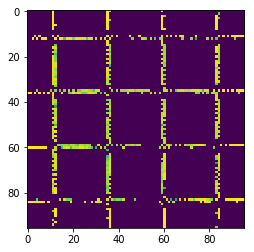

In [10]:
fig = plt.figure()
im = plt.imshow(image, animated=True)
# roads = [cross1, cross2, cross3, cross4, void]

def updatefig(frame):
    frame+=t
    for road in RoadManager.roads:
        road.move_cars(frame)
    
    for road in RoadManager.roads:
        road.step(frame)
    
    for road in RoadManager.roads:
        road.process_outputs()
    
    
#     cr1 = crossroad1.render()
#     cr2 = crossroad2.render()
#     cr3 = crossroad3.render()
#     cr4 = crossroad4.render()

#     top = np.concatenate((cr1, cr2), axis=1)
#     bottom = np.concatenate((cr3, cr4), axis=1)
    
    im.set_array(np.vstack((np.hstack((cross1.render(),cross2.render())), np.hstack((cross3.render(), cross4.render())))))
    return im,

In [11]:
ani = animation.FuncAnimation(fig, updatefig, interval=100, blit=True, frames= 1000)
HTML(ani.to_html5_video())

In [12]:
len(CarManager.all_cars)

7653

In [13]:
# results = np.zeros_like(void.get_stats(), dtype="float32")
results = np.zeros_like(np.array(void_hor.get_stats()), dtype="float32")
for road in RoadManager.roads:
    results += np.array(road.get_stats())

In [14]:
density = results[:, 1]/results[:, 0]
speed = results[:, 2]/results[:, 1]
speed[np.isnan(speed)] = 0
flow = speed*density
density_speed_flow = np.hstack((density.reshape((-1, 1)), speed.reshape((-1, 1)), flow.reshape((-1, 1))))

c:\users\doctortyrsa\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [15]:
from scipy.signal import savgol_filter

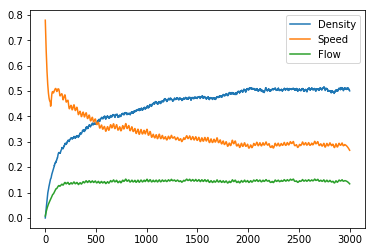

In [16]:
plt.plot(density)
plt.plot(savgol_filter(speed, 101, 3))
plt.plot(savgol_filter(flow, 101, 3))
plt.legend(["Density", "Speed", "Flow"])

Text(0, 0.5, 'Traffic flow')

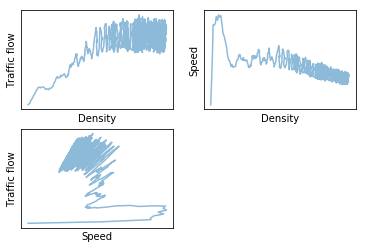

In [17]:
plt.subplot(2,2,1)
plt.xticks([]), plt.yticks([])
# plt.title('1')
plt.plot(density_speed_flow[:, 0], density_speed_flow[:, 2], alpha=.5, )
plt.xlabel("Density")
plt.ylabel("Traffic flow")
 
plt.subplot(2,2,2)
plt.xticks([]), plt.yticks([])
# plt.title('2')
plt.plot(density_speed_flow[:, 0], density_speed_flow[:, 1], alpha=.5, )
plt.xlabel("Density")
plt.ylabel("Speed")

plt.subplot(2,2,3)
plt.xticks([]), plt.yticks([])
# plt.title('3')
plt.plot(density_speed_flow[:, 1], density_speed_flow[:, 2], alpha=.5, )
plt.xlabel("Speed")
plt.ylabel("Traffic flow")

In [18]:
plt.scatter(density_speed_flow[:, 0], density_speed_flow[:, 2], alpha=.5, )
plt.xlabel("Density")
plt.ylabel("Traffic flow")

Text(0, 0.5, 'Traffic flow')

In [19]:
plt.scatter(density_speed_flow[:, 0], density_speed_flow[:, 1], alpha=.5, )
plt.xlabel("Density")
plt.ylabel("Speed")

Text(0, 0.5, 'Speed')

Text(0, 0.5, 'Traffic flow')

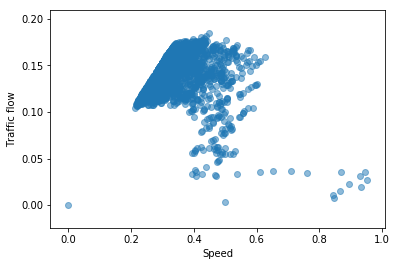

In [20]:
plt.scatter(density_speed_flow[:, 1], density_speed_flow[:, 2], alpha=.5, )
plt.xlabel("Speed")
plt.ylabel("Traffic flow")

Text(0.5, 0, 'Flow')

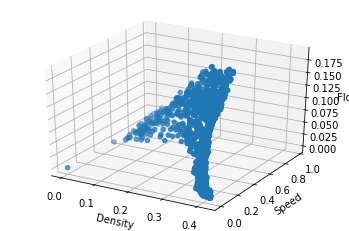

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(density_speed_flow[:, 0].tolist(), density_speed_flow[:, 1].tolist(), density_speed_flow[:, 2].tolist())
ax.set_xlabel('Density')
ax.set_ylabel('Speed')
ax.set_zlabel('Flow')

# Collecting data

In [5]:
from tqdm import tqdm
import pickle

In [6]:
NUM_EPOCH = 2000
LAST_N = 1100
N_STEPS = 10
RED = 20
GREEn = 10

In [7]:
def execute_with(p:int):
    data = defaultdict(lambda : np.zeros((LAST_N, 3)))
    cross1 = CrossroadAndLines2x2(10, RED, GREEn)
    cross2 = CrossroadAndLines2x2(10, RED, GREEn)
    cross3 = CrossroadAndLines2x2(10, RED, GREEn)
    cross4 = CrossroadAndLines2x2(10, RED, GREEn)

    void_ver = VoidGenerator(p, random_walk=True, p_rot=[.35, .35, .15, .15], first_n = 4)
    void_hor = VoidGenerator(p, random_walk=True, p_rot=[.15, .15, .35, .35], first_n = 4)
    ############################################################
    ############################################################
    cross1.crossroad1.output_roads[0].add_output(void_hor, 0, 0)
    cross1.crossroad1.output_roads[3].add_output(void_ver, 0, 1)

    cross1.crossroad2.output_roads[1].add_output(cross2.crossroad1.input_roads[1], 0, 0)
    cross1.crossroad2.output_roads[3].add_output(void_ver, 0, 2)

    cross1.crossroad3.output_roads[0].add_output(void_hor, 0, 3)
    cross1.crossroad3.output_roads[2].add_output(cross3.crossroad1.input_roads[2], 0, 0)

    cross1.crossroad4.output_roads[1].add_output(cross2.crossroad3.input_roads[1], 0, 0)
    cross1.crossroad4.output_roads[2].add_output(cross3.crossroad2.input_roads[2], 0, 0)

    ################################################################
    cross2.crossroads[0].output_roads[0].add_output(cross1.crossroad2.input_roads[0], 0, 0)
    cross2.crossroads[0].output_roads[3].add_output(void_ver, 0, 4)

    cross2.crossroads[1].output_roads[1].add_output(void_hor, 0, 5)
    cross2.crossroads[1].output_roads[3].add_output(void_ver, 0, 6)

    cross2.crossroads[2].output_roads[0].add_output(cross1.crossroad4.input_roads[0], 0, 0)
    cross2.crossroads[2].output_roads[2].add_output(cross4.crossroad1.input_roads[2], 0, 0)

    cross2.crossroads[3].output_roads[1].add_output(void_hor, 0, 7)
    cross2.crossroads[3].output_roads[2].add_output(cross4.crossroad2.input_roads[2], 0, 0)

    ################################################################
    cross3.crossroads[0].output_roads[0].add_output(void_hor, 0, 8)
    cross3.crossroads[0].output_roads[3].add_output(cross1.crossroad3.input_roads[3], 0, 0)

    cross3.crossroads[1].output_roads[1].add_output(cross4.crossroad1.input_roads[1], 0, 0)
    cross3.crossroads[1].output_roads[3].add_output(cross1.crossroad4.input_roads[3], 0, 0)

    cross3.crossroads[2].output_roads[0].add_output(void_hor, 0, 9)
    cross3.crossroads[2].output_roads[2].add_output(void_ver, 0, 10)

    cross3.crossroads[3].output_roads[1].add_output(cross4.crossroad3.input_roads[1], 0, 0)
    cross3.crossroads[3].output_roads[2].add_output(void_ver, 0, 11)

    ################################################################
    cross4.crossroads[0].output_roads[0].add_output(cross3.crossroad2.input_roads[0], 0, 0)
    cross4.crossroads[0].output_roads[3].add_output(cross2.crossroad3.input_roads[3], 0, 0)

    cross4.crossroads[1].output_roads[1].add_output(void_hor, 0, 12)
    cross4.crossroads[1].output_roads[3].add_output(cross2.crossroad4.input_roads[3], 0, 0)

    cross4.crossroads[2].output_roads[0].add_output(cross3.crossroads[3].input_roads[0], 0, 0)
    cross4.crossroads[2].output_roads[2].add_output(void_ver, 0, 13)

    cross4.crossroads[3].output_roads[1].add_output(void_hor, 0, 14)
    cross4.crossroads[3].output_roads[2].add_output(void_ver, 0, 15)
    ############################################################
    ############################################################
    void_hor.add_output(cross1.crossroads[0].input_roads[1], 0)
    void_ver.add_output(cross1.crossroads[0].input_roads[2], 1)

    void_ver.add_output(cross1.crossroads[1].input_roads[2], 2)
    void_hor.add_output(cross1.crossroads[2].input_roads[1], 3)

    #######################################################
    void_hor.add_output(cross2.crossroads[1].input_roads[0], 4)
    void_ver.add_output(cross2.crossroads[1].input_roads[2], 5)

    void_ver.add_output(cross2.crossroads[0].input_roads[2], 6)
    void_hor.add_output(cross2.crossroads[3].input_roads[0], 7)

    #######################################################
    void_hor.add_output(cross3.crossroads[2].input_roads[1], 8)
    void_ver.add_output(cross3.crossroads[2].input_roads[3], 9)

    void_hor.add_output(cross3.crossroads[0].input_roads[1], 10)
    void_ver.add_output(cross3.crossroads[3].input_roads[3], 11)

    #######################################################
    void_hor.add_output(cross4.crossroads[3].input_roads[0], 12)
    void_ver.add_output(cross4.crossroads[3].input_roads[3], 13)

    void_hor.add_output(cross4.crossroads[1].input_roads[0], 14)
    void_ver.add_output(cross4.crossroads[2].input_roads[3], 15)
    
    
#     roads = [cross1, cross2, cross3, cross4, void]
    
    for epoch in tqdm(range(NUM_EPOCH), total = NUM_EPOCH):
        for road in RoadManager.roads:
            road.move_cars(epoch)
    
        for road in RoadManager.roads:
            road.step(epoch)

        for road in RoadManager.roads:
            road.process_outputs()
    
#     stats = np.zeros((LAST_N, 4))
    results = np.zeros((NUM_EPOCH, 3), dtype="float32")
    for road in RoadManager.roads:
        results += np.array(road.get_stats()[-NUM_EPOCH:])
    
    for car in CarManager.all_cars:
        del car
    
    CarManager.all_cars = []
    return results

In [ ]:
road.get_stats()

In [9]:
results = np.array([0, 0, 0])
for p in (.1, .3, .5, .6, .7):
    results = np.vstack((results, execute_with(p)))

100%|██████████████████████████████████████| 2000/2000 [03:43<00:00,  8.98it/s]


In [11]:
result = results

In [12]:
density = result[:, 1]/result[:, 0]
speed = result[:, 2]/result[:, 1]
speed[np.isnan(speed)] = 0
flow = speed*density
density_speed_flow = np.hstack((density.reshape((-1, 1)), speed.reshape((-1, 1)), flow.reshape((-1, 1))))

c:\users\doctortyrsa\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
c:\users\doctortyrsa\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [13]:
np.save("superstatistic.npy", density_speed_flow)

Text(0, 0.5, 'Traffic flow')

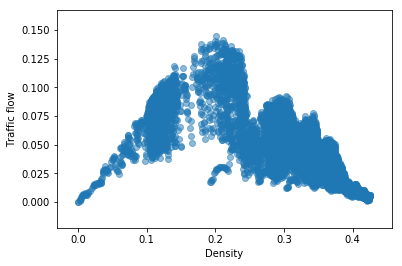

In [14]:
plt.scatter(density_speed_flow[:, 0], density_speed_flow[:, 2], alpha=.5, )
plt.xlabel("Density")
plt.ylabel("Traffic flow")

Text(0, 0.5, 'Speed')

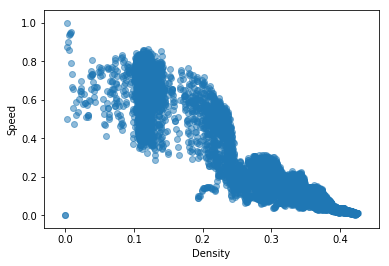

In [15]:
plt.scatter(density_speed_flow[:, 0], density_speed_flow[:, 1], alpha=.5, )
plt.xlabel("Density")
plt.ylabel("Speed")

Text(0, 0.5, 'Traffic flow')

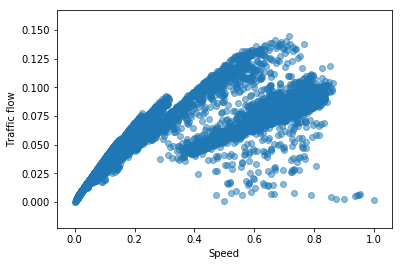

In [16]:
plt.scatter(density_speed_flow[:, 1], density_speed_flow[:, 2], alpha=.5, )
plt.xlabel("Speed")
plt.ylabel("Traffic flow")

Text(0.5, 0, 'Flow')

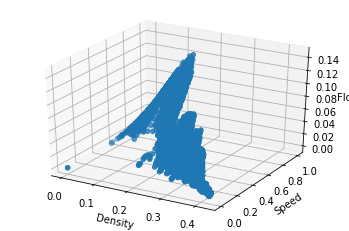

In [17]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(density_speed_flow[:, 0].tolist(), density_speed_flow[:, 1].tolist(), density_speed_flow[:, 2].tolist())
ax.set_xlabel('Density')
ax.set_ylabel('Speed')
ax.set_zlabel('Flow')

In [26]:
Axes3D.scatter(density_speed_flow[:, 0].tolist(), density_speed_flow[:, 1].tolist(), density_speed_flow[:, 2].tolist())

In [6]:
cross = Crossroad(1, 1, 1, 1, rotate=True)

In [17]:
cross.add_car(Car(rotate_in_case = True), 1)
cross.add_car(Car(rotate_in_case = True), 2)

1

(array([0, 2]), 1, 0)

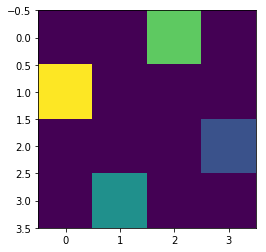

In [29]:
cross.move_cars()
cross.step()
plt.imshow(cross.render())
cross._cars[1].position(), cross._cars[1].speed_code, cross._cars[1].counter

In [36]:
cross.n_left < cross._cars[1].position()[0] and cross.is_empty(cross._cars[1].position() + speeds[4])

False

In [47]:
cross.is_empty(cross._cars[1].position() + speeds[4])

1

In [30]:
cross._cars[1].position(), cross._cars[1].speed_code, cross._cars[1].counter

(array([2, 1]), 3, 3)